# Lab  Assignment 2
## Name : Elvis Sawing anak Muran | Matric No : U2101680/2

## Preprocessing

## Import libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#ANN visualization
from ann_visualizer.visualize import ann_viz


In [7]:
# load datasets
white = pd.read_csv("../datasets/winequality-white.csv", sep=';') 
red = pd.read_csv("../datasets/winequality-red.csv", sep=';')

In [8]:
#white's info
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [4]:
#red's info
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [6]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## EDA

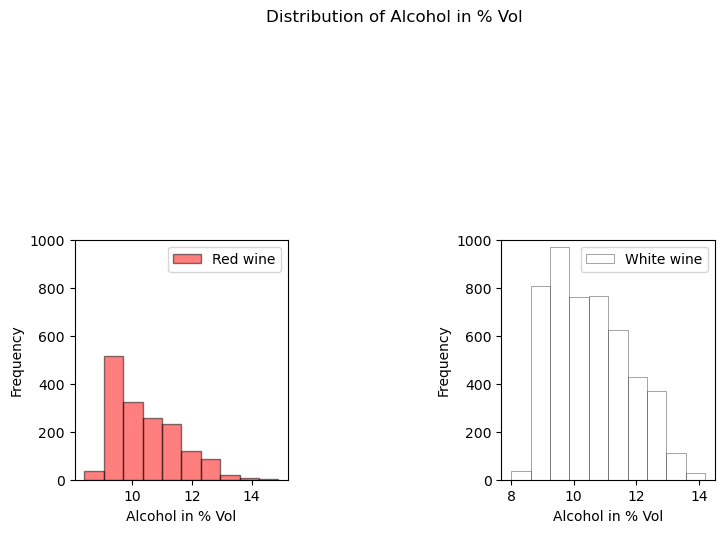

In [9]:
fig, ax = plt.subplots(1,2)

#red
ax[0].hist(red.alcohol, 10, facecolor='red', ec="black", alpha=0.5, label="Red wine")
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")

#white
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)

ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

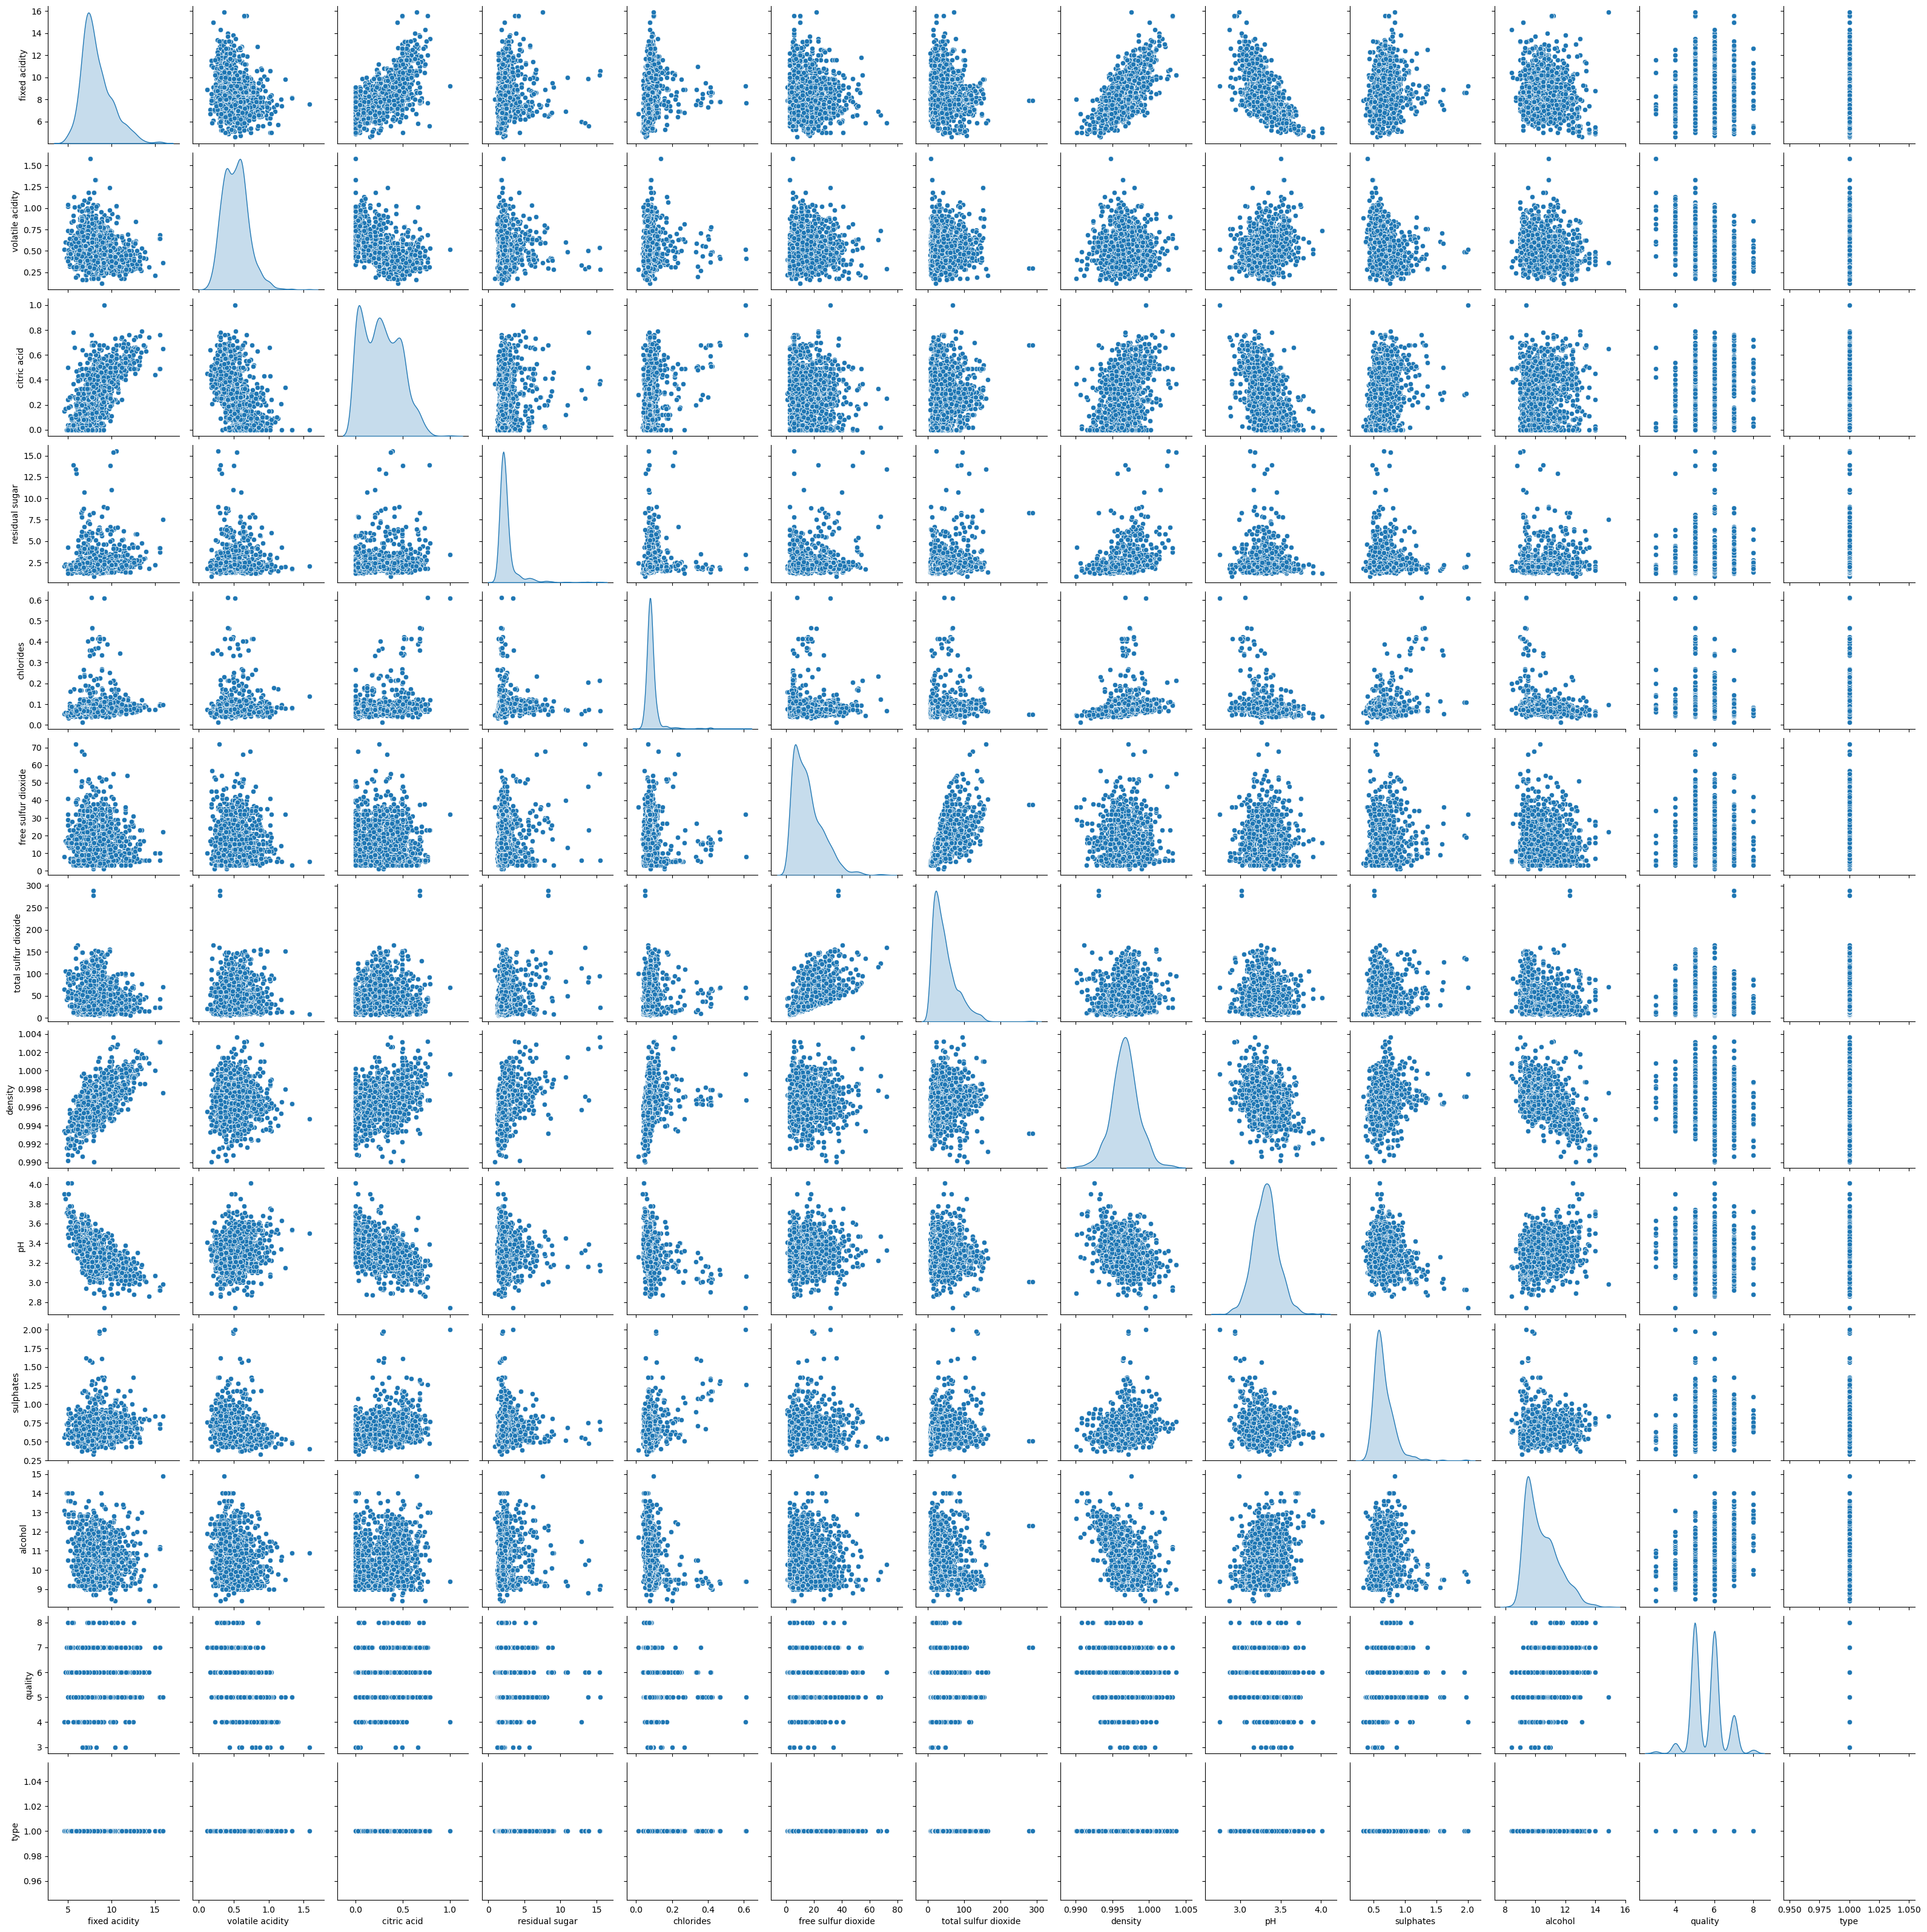

In [30]:
sns.pairplot(data=red, diag_kind='kde')


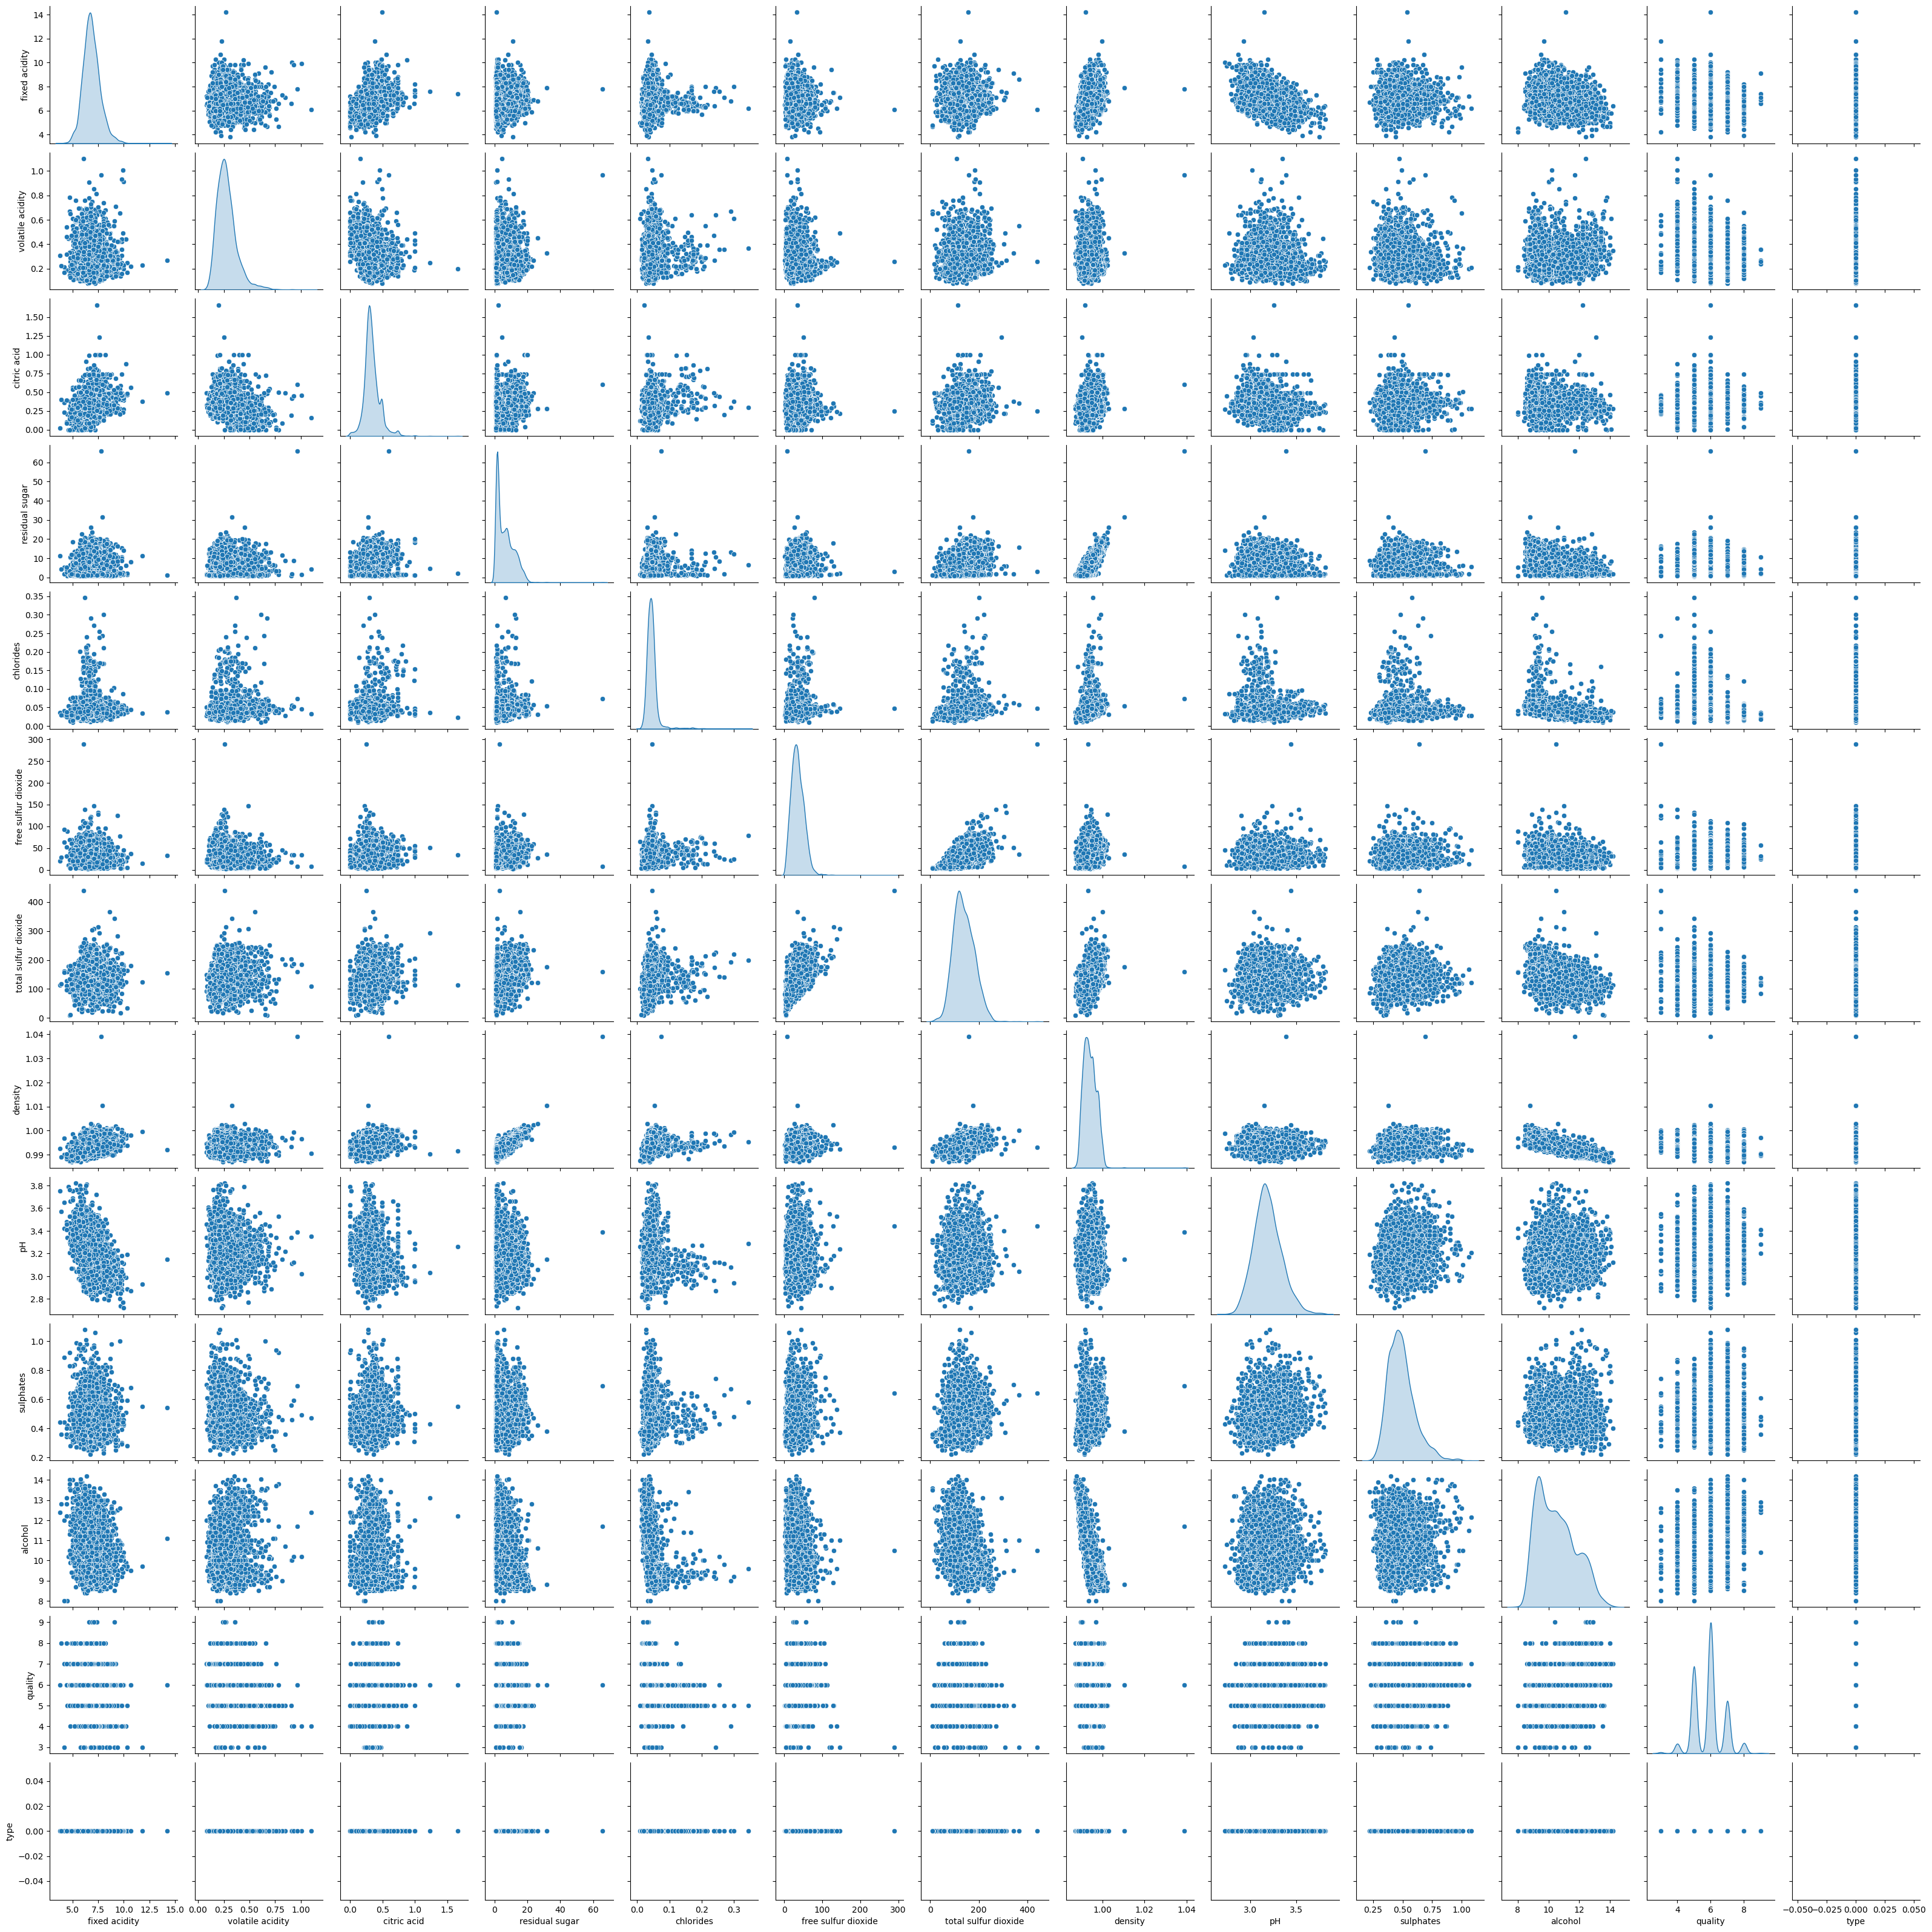

In [31]:
sns.pairplot(data=white, diag_kind='kde')


In [10]:
red['type'] = 1
white['type'] = 0
wines=pd.concat([red, white], ignore_index=True)
wines.tail()

# save the concatenated data
wines.to_csv('../datasets/winesConcatenated.csv', index=False)

In [11]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## Correlation Map

<Axes: >

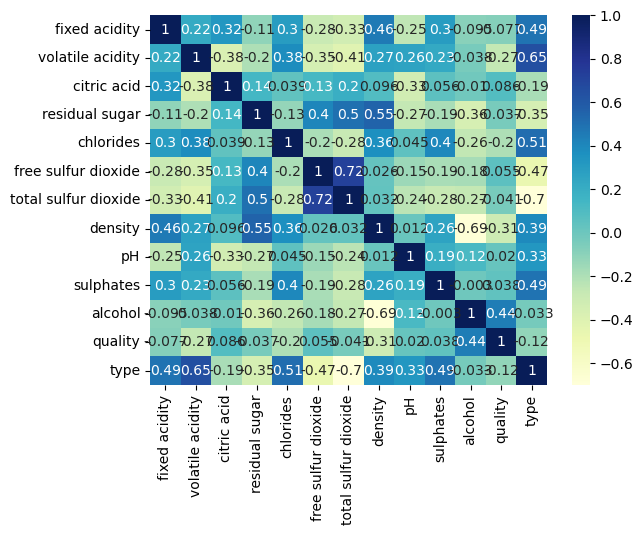

In [11]:
corr = wines[wines.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

## Splitting of data

In [12]:
X = wines.iloc[:,0:11] 
#iloc -> selection by integer position
# : -> means we want to select all rows of the dataframe
# 0:11 -> columns from index 0 to 11(exclusive)

y=np.ravel(wines.type) # flatten the array and specify target labels
 
#split into train and remaining
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8 ,random_state=42)

#remaining split into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(5197, 11)
(5197,)
(650, 11)
(650,)
(650, 11)
(650,)


(None, None)

In [13]:
# Scale
Standardscaler = StandardScaler().fit(X_train)

X_train = Standardscaler.transform(X_train)
X_valid = Standardscaler.transform(X_valid)
X_test = Standardscaler.transform(X_test)

##  Architecture Modeling

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers

In [15]:

architectures = [
    # Architecture 1 (1 hidden)
    keras.Sequential([
        layers.Dense(12, activation='sigmoid', input_shape=(11,)),  #input layer
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ]),
    
    # Architecture 2 (3 hidden)
    keras.Sequential([
        layers.Dense(12, activation='relu', input_shape=(11,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]),
    
    # Architecture 3 (large)
    keras.Sequential([
        layers.Dense(12, activation='relu', input_shape=(11,)),
        layers.Dropout(0.2),
        layers.Dense(12, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]),
    
    # Architecture 4 (medium 8)
    keras.Sequential([
        layers.Dense(12, activation='relu', input_shape=(11,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]),
    
    # Architecture 5
    keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(11,), kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(1, activation='sigmoid')
    ])
]




In [17]:
histories = []

for i, model in enumerate(architectures):
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    print(f"Compiled Architecture {i+1}")
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, validation_data=(X_valid,y_valid))
    histories.append(history)

Compiled Architecture 1
Epoch 1/20
5197/5197 [==============================] - 14s 3ms/step - loss: 0.1478 - accuracy: 0.9505 - val_loss: 0.0576 - val_accuracy: 0.9892
Epoch 2/20
5197/5197 [==============================] - 15s 3ms/step - loss: 0.0307 - accuracy: 0.9940 - val_loss: 0.0541 - val_accuracy: 0.9877
Epoch 3/20
5197/5197 [==============================] - 11s 2ms/step - loss: 0.0257 - accuracy: 0.9948 - val_loss: 0.0471 - val_accuracy: 0.9892
Epoch 4/20
5197/5197 [==============================] - 11s 2ms/step - loss: 0.0243 - accuracy: 0.9944 - val_loss: 0.0464 - val_accuracy: 0.9892
Epoch 5/20
5197/5197 [==============================] - 12s 2ms/step - loss: 0.0228 - accuracy: 0.9952 - val_loss: 0.0426 - val_accuracy: 0.9892
Epoch 6/20
5197/5197 [==============================] - 17s 3ms/step - loss: 0.0221 - accuracy: 0.9954 - val_loss: 0.0424 - val_accuracy: 0.9908
Epoch 7/20
5197/5197 [==============================] - 16s 3ms/step - loss: 0.0206 - accuracy: 0.9954 - v

In [29]:
#architecture visualization
for i, architecture in enumerate(architectures):
    ann_viz(architecture, title='Architecture {}'.format(i+1))


In [20]:
val_losses = []
for history in histories:
    val_loss = history.history['val_loss'][-1]  # Get the final validation loss
    val_losses.append(val_loss)

best_model_index = val_losses.index(min(val_losses))
best_model = architectures[best_model_index]

print(f"The best model architecture is Architecture {best_model_index + 1} with the lowest validation loss.")

The best model architecture is Architecture 4 with the lowest validation loss.


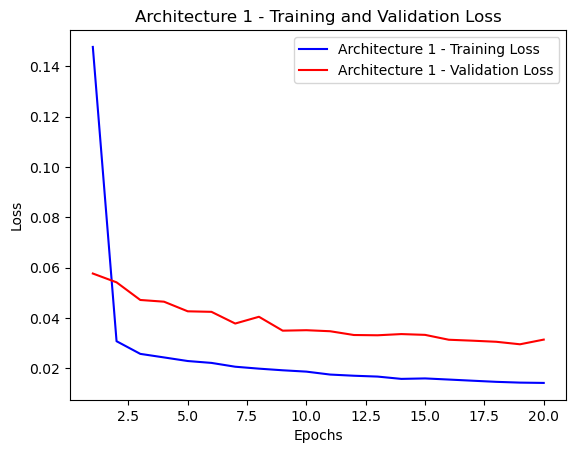

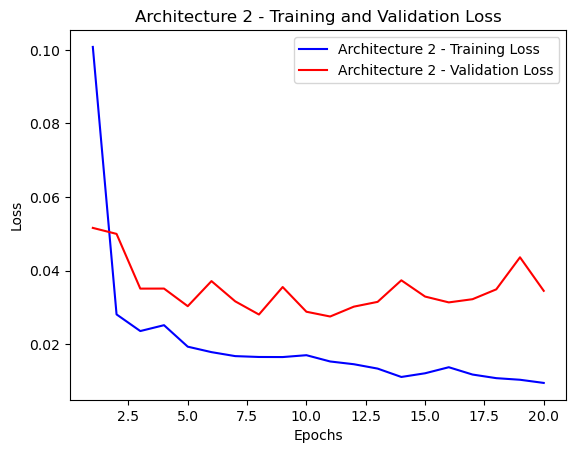

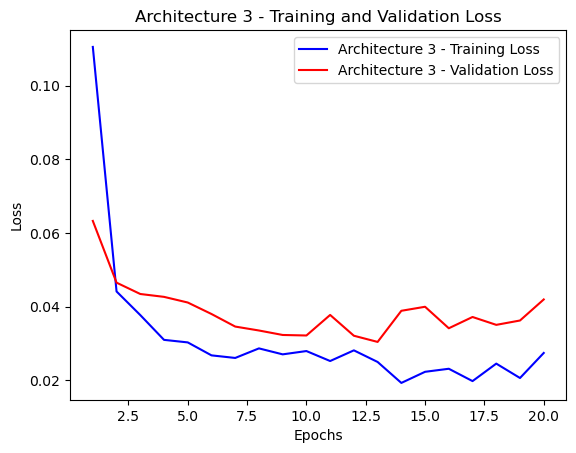

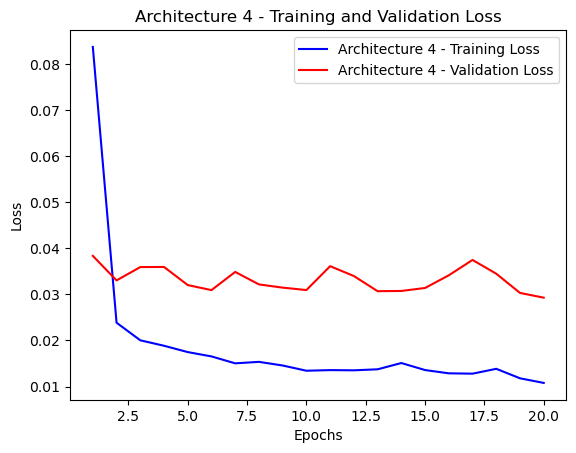

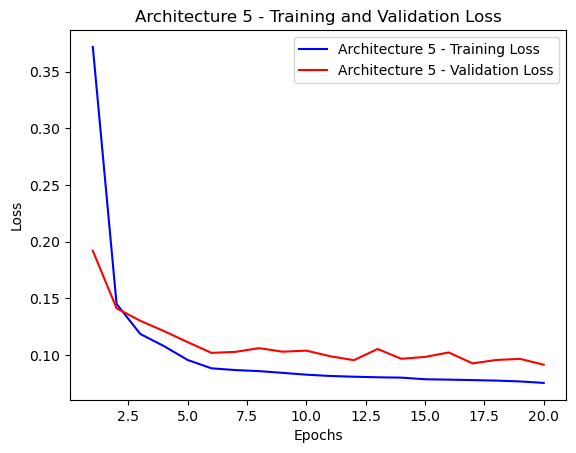

In [21]:
#DISPLAY THE GRAPH

for i, history in enumerate(histories):
    # Get the training loss values
    loss = history.history['loss']
    
    # Get the validation loss values
    val_loss = history.history['val_loss']
    
    # Plot the training and validation loss curves
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label=f'Architecture {i+1} - Training Loss')
    plt.plot(epochs, val_loss, 'r', label=f'Architecture {i+1} - Validation Loss')
    plt.title(f'Architecture {i+1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Tuning

In [22]:
#HYPERPARAMETER


# Define a function to create the model with the desired hyperparameters
def create_model(learning_rate, batch_size, optimizer, activation, regularizer):
    model = keras.Sequential([
        layers.Dense(16, activation=activation, input_shape=(11,), kernel_regularizer=regularizer),
        layers.Dense(32, activation=activation, kernel_regularizer=regularizer),
        layers.Dense(64, activation=activation, kernel_regularizer=regularizer),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the hyperparameters to tune

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
optimizers = ['Adam', 'SGD']
activations = ['relu', 'sigmoid']
regularizers = [None, regularizers.l1_l2(l1=0.01, l2=0.01)]

# Initialize dictionaries to store performance metrics for each combination
performance_metrics = {}

# Iterate over each hyperparameter and train and evaluate the model for each combination
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        for optimizer in optimizers:
            for activation in activations:
                for regularizer in regularizers:
                    # Create the model with the current hyperparameters
                    model = create_model(learning_rate, batch_size, optimizer, activation, regularizer)
                    
                    # Train the model
                    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=batch_size, verbose=0)
                    
                    # Evaluate the model on the test set
                    y_pred_probs = model.predict(X_test)
                    y_pred = (y_pred_probs > 0.5).astype(int)
                    
                    # Calculate performance metrics
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, zero_division=1)  # Set zero_division=1 to avoid the warning
                    recall = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)
                    
                    # Store the performance metrics in the dictionary
                    combination = f"Learning Rate: {learning_rate}, Batch Size: {batch_size}, Optimizer: {optimizer}, Activation: {activation}, Regularizer: {regularizer}"
                    performance_metrics[combination] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Print the performance metrics for each combination
for combination, metrics in performance_metrics.items():
    print(combination)
    print(metrics)
    print()


21/21 [==============================] - 0s 1ms/step
Learning Rate: 0.001, Batch Size: 16, Optimizer: Adam, Activation: relu, Regularizer: None
{'Accuracy': 0.9953846153846154, 'Precision': 0.994413407821229, 'Recall': 0.9888888888888889, 'F1-Score': 0.9916434540389972}

Learning Rate: 0.001, Batch Size: 16, Optimizer: Adam, Activation: relu, Regularizer: <keras.regularizers.L1L2 object at 0x000001F9D87996F0>
{'Accuracy': 0.9876923076923076, 'Precision': 0.9886363636363636, 'Recall': 0.9666666666666667, 'F1-Score': 0.9775280898876404}

Learning Rate: 0.001, Batch Size: 16, Optimizer: Adam, Activation: sigmoid, Regularizer: None
{'Accuracy': 0.9938461538461538, 'Precision': 0.9888888888888889, 'Recall': 0.9888888888888889, 'F1-Score': 0.9888888888888889}

Learning Rate: 0.001, Batch Size: 16, Optimizer: Adam, Activation: sigmoid, Regularizer: <keras.regularizers.L1L2 object at 0x000001F9D87996F0>
{'Accuracy': 0.7230769230769231, 'Precision': 1.0, 'Recall': 0.0, 'F1-Score': 0.0}

Learnin

In [23]:
#TABLE
hyperparameters = [
    {
        'Learning Rate': 0.001,
        'Batch Size': 16,
        'Optimizer': 'Adam',
        'Activation': 'relu',
        'Regularizer': 'None',
        'Accuracy': 0.992,
        'Precision': 0.983,
        'Recall': 0.988,
        'F1-Score': 0.985
    },
   ]

# Create a pandas DataFrame with the hyperparameter settings and results
df = pd.DataFrame(hyperparameters)

# Set the order of the columns in the table
columns_order = [
    'Learning Rate',
    'Batch Size',
    'Optimizer',
    'Activation',
    'Regularizer',
    'Accuracy',
    'Precision',
    'Recall',
    'F1-Score'
]

# Rearrange the columns in the DataFrame based on the specified order
df = df[columns_order]

# Display the DataFrame
print(df)

   Learning Rate  Batch Size Optimizer Activation Regularizer  Accuracy  \
0          0.001          16      Adam       relu        None     0.992   

   Precision  Recall  F1-Score  
0      0.983   0.988     0.985  


## Model Evaluation

In [24]:

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


21/21 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9938
Test Loss: 0.025925571098923683
Test Accuracy: 0.9938461780548096


In [25]:
# Evaluate the model on the validation set
val_predictions = best_model.predict(X_valid)
val_predictions = (val_predictions > 0.5)  

val_accuracy = accuracy_score(y_valid, val_predictions)
val_precision = precision_score(y_valid, val_predictions)
val_recall = recall_score(y_valid, val_predictions)
val_f1 = f1_score(y_valid, val_predictions)

print("Performance on Validation Set:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

# Evaluate the model on the testing set
test_predictions = best_model.predict(X_test)
test_predictions = (test_predictions > 0.5)  

test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nPerformance on Testing Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

21/21 [==============================] - 0s 1ms/step
Performance on Validation Set:
Accuracy: 0.9954
Precision: 1.0000
Recall: 0.9814
F1-Score: 0.9906
21/21 [==============================] - 0s 1ms/step

Performance on Testing Set:
Accuracy: 0.9938
Precision: 0.9889
Recall: 0.9889
F1-Score: 0.9889
